The **retail** data includes one dependent variable (sales) and a series of independent variables of different categories such as Brochures.quantity(Brochures category), Brand Country.Online Video Views (Digital category), etc.

**Data File:** Retail test case.xlsx as “retail_data1.xlsx”

**Size:** 1.8 MB on disk (with 2515 row and 90 columns)

**About data:**
The retail data includes each new campaign technique (which typically lasts 2-4 weeks) such as TV, Radio, Print, Digital, etc. All of these ways of campaign are executed at a similar time, which can make it difficult to separate the impact of each activity.
It contains one dependent variable (sales) and a series of independent variables of different categories such as Brochures.quantity (Brochures category), Brand Country.Online Video Views (Digital category), etc.

**Purpose:**  
*Exploring the dataset 

*Identify the contribution of different campaign activities on sales.

*correlation between variables


# 1. Loading the excel file into dataframe using pandas
**Pandas**: popular Python library for data exploration, manipulation, and analysis

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read csv file containing different features
df = pd.read_excel("retail_data1.xlsx")

In [3]:
# messy data
df.head()

,Unnamed: 0,Unnamed: 1,Dependent Variable,Unnamed: 3,Unnamed: 4,Independent Variables,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,NaN,NaN,NaN,NaN,Expected sign -->,Positive,NaN,Positive,Positive,Positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Variable category -->,Brochures,Category,Digital,Digital,Digital,...,Weather,Weather,Windows,Windows,Windows,Windows,Windows,Windows,Windows,Windows
2,NaN,Period,Sales,NaN,Variable name -->,Brochures.quantity,Category.Value,Brand Country.Online Video Views,Click And Collect,Brand BME.Facebook Impressions,...,Regional.Snow,Regional.Rain,Window Changes.Back Wall,Window Changes.Back Drop and Props,Window Changes.Product,Window Sticker.Discount with Purchase,Window Sticker.Other,Window Sticker.Percentage Discount,Window Type.Sale,Window Type.Wardrobe
3,Region 1,2013-08-29 00:00:00,4136221,NaN,NaN,0,2.01785e+06,0,0,0,...,0,25947.4,0,0,0,10984.9,0,1201.9,0,147573
4,Region 1,2013-09-05 00:00:00,3824633,NaN,NaN,0,2.01785e+06,51193.2,0,0,...,0,78660.5,0,0,31515.8,25631.4,0,5608.86,0,147573


In [4]:
df.shape

(2515, 90)

# 2. Data Cleaning

In [5]:
df.columns = df.iloc[2] # setting the categories as dataframe headers

In [6]:
df = df.iloc[3:]

In [7]:
df = df[df.columns.dropna()] # drop nan columns (Columns: A,D)

In [8]:
# drop columns that are not in use
df = df.drop(columns=['Period','Variable name -->','Category.Value']) # (Columns: B,E)

In [9]:
# check the shape of the DataFrame (rows, columns)
# there are 2512 rows x 85 columns
df.shape

(2512, 85)

In [10]:
# display the first 5 rows
df.head()

2,Sales,Brochures.quantity,Brand Country.Online Video Views,Click And Collect,Brand BME.Facebook Impressions,Brand BME.Youtube Impressions,Accelerator.Value of Discounted Sales,Comeback.Value of Discounted Sales,Event.Value of Discounted Sales,Cooperations.Value of Discounted Sales,...,Regional.Snow,Regional.Rain,Window Changes.Back Wall,Window Changes.Back Drop and Props,Window Changes.Product,Window Sticker.Discount with Purchase,Window Sticker.Other,Window Sticker.Percentage Discount,Window Type.Sale,Window Type.Wardrobe
3,4136221,0,0,0,0,0,0,0,0,0,...,0,25947.4,0,0,0,10984.9,0,1201.9,0,147573
4,3824633,0,51193.2,0,0,0,0,0,0,0,...,0,78660.5,0,0,31515.8,25631.4,0,5608.86,0,147573
5,4802861,0,149707,0,99.1147,0,0,0,0,0,...,0,99815.9,0,0,0,25631.4,0,4006.33,0,147573
6,4576550,0,31527.2,0,241.911,0,0,0,0,0,...,0,36817.3,21539.1,23989.6,31515.8,40278,0,0,0,147573
7,5558613,0,6305.45,0,248.862,0,0,0,0,0,...,0,14025.6,0,0,0,18308.2,13394.5,2003.16,0,147573


In [11]:
df.columns

Index(['Sales', 'Brochures.quantity', 'Brand Country.Online Video Views',
       'Click And Collect', 'Brand BME.Facebook Impressions',
       'Brand BME.Youtube Impressions',
       'Accelerator.Value of Discounted Sales',
       'Comeback.Value of Discounted Sales', 'Event.Value of Discounted Sales',
       'Cooperations.Value of Discounted Sales',
       'Store Specific.Value of Discounted Sales',
       'Discount Proactive.Value of Discounted Sales',
       'Discount Reactive.Value of Discounted Sales',
       'Unclassified.Value of Discounted Sales',
       ' Media Help.Value of Discounted Sales', 'Markdown.Value Transformed',
       ' Markdown Discount.Value of Discounted Sales', 'OOH.GRPs',
       'OOH.Ambient Contacts', 'PR.Circulations', 'Total.Print GRPs',
       'Product impact', 'Christmas.Radio GRPs', 'Festival.Radio GRPs',
       'Kids.Radio GRPs', 'Knitwear.Radio GRPs', 'Mid Season.Radio GRPs',
       'Promotion.Radio GRPs', 'Sale.Radio GRPs', 'Store.Radio GRPs',
       

####  Primary object types:

    DataFrame: rows and columns (like a spreadsheet or matrix)
       -First row will always be the column headers
       -First column is an index
    Series: a single column (vector)



In [12]:
# display the last 5 rows
df.tail()

2,Sales,Brochures.quantity,Brand Country.Online Video Views,Click And Collect,Brand BME.Facebook Impressions,Brand BME.Youtube Impressions,Accelerator.Value of Discounted Sales,Comeback.Value of Discounted Sales,Event.Value of Discounted Sales,Cooperations.Value of Discounted Sales,...,Regional.Snow,Regional.Rain,Window Changes.Back Wall,Window Changes.Back Drop and Props,Window Changes.Product,Window Sticker.Discount with Purchase,Window Sticker.Other,Window Sticker.Percentage Discount,Window Type.Sale,Window Type.Wardrobe
2510,268443,4.22207e-06,9.06112e-63,489.625,2.99616,0.0142448,3068.87,0,0,824.999,...,0,3052.7,0,0,0,0,0,0,0,0
2511,223891,8.44414e-07,1.81222e-63,183.077,3.03345,0.00427344,2318.8,0,0,209.976,...,0,3052.7,0,1513.44,1988.25,0,0,0,0,9309.98
2512,177858,1.68883e-07,3.62445e-64,430.018,2.47245,0.00128203,2010.3,0,0,66.3306,...,0,2035.13,0,0,0,0,0,0,0,9309.98
2513,207546,393.524,7.24889e-65,787.657,3.32402,0.000384609,1958.14,0,0,261.618,...,0,4070.27,0,1513.44,1988.25,1617.02,0,75.8246,0,0
2514,224127,78.7047,647.191,353.381,4.49848,0.000115383,1846.57,0,0,593.976,...,0,0,0,0,0,1617.02,0,176.924,0,0


# 3. Exploratory Data Analysis
#### **What are the features of our dataset?**

Each new campaign in retail industry(which typically lasts 2-4 weeks) may include TV, Radio, Print, Digital … features.  

    Few examples:
    PR : PR media activity
    Print : Print media activity
    Product impact : Measure of how strong the product range is 
    
#### **What is the response?**
    Sales: sales of a single product in a given market (in thousands of items)
    
#### **What else do we know?**
    Because the response variable is continuous, this is a regression problem.
    There are 2512 observations (represented by the rows)

In [13]:
# Data viz libraries
# Seaborn: Python library for statistical data visualization built on top of Matplotlib
import seaborn as sns
%matplotlib inline

##### Coverting the data types

In [14]:
# checking data types of few columns
df_temp_pr_print_product = df[['PR.Circulations', 'Total.Print GRPs', 'Product impact','Sales']].copy()
df_temp_pr_print_product['Total.Print GRPs'].dtype.kind

'O'

Here, 'O' represents the object type

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
# Convert the data type of entire data to float
df = df.apply(pd.to_numeric, errors="ignore")

In [17]:
df['Total.Print GRPs'].dtype.kind

'f'

Converted to float data type

### **Because the dataset has 85 features, before any feature-engineering, lets plot an heatmap**
The best thing about the heatmap is that it can show the **Pearson correlation coefficient for each feature to every other feature**.

#### **Pearson correlation** test is a parametric test that makes assumption about the data. In order for the results of a Pearson correlation test to be valid, the data must meet these assumptions:

* The sample is independently and randomly drawn
* A linear relationship between the two variables is present
* When plotted, the lines form a line and is not curved
* There is homogeneity of variance
* The variables being used in the correlation test should be continuous

The Pearson correlation indicates that there is a statistically significant strong relationship between the variables.

Therefore 'Heatmap' is a great way to gain insight into your data during EDA and I found quite a few different ways to customize the heatmap to suit your specific needs and make it easier to understand.

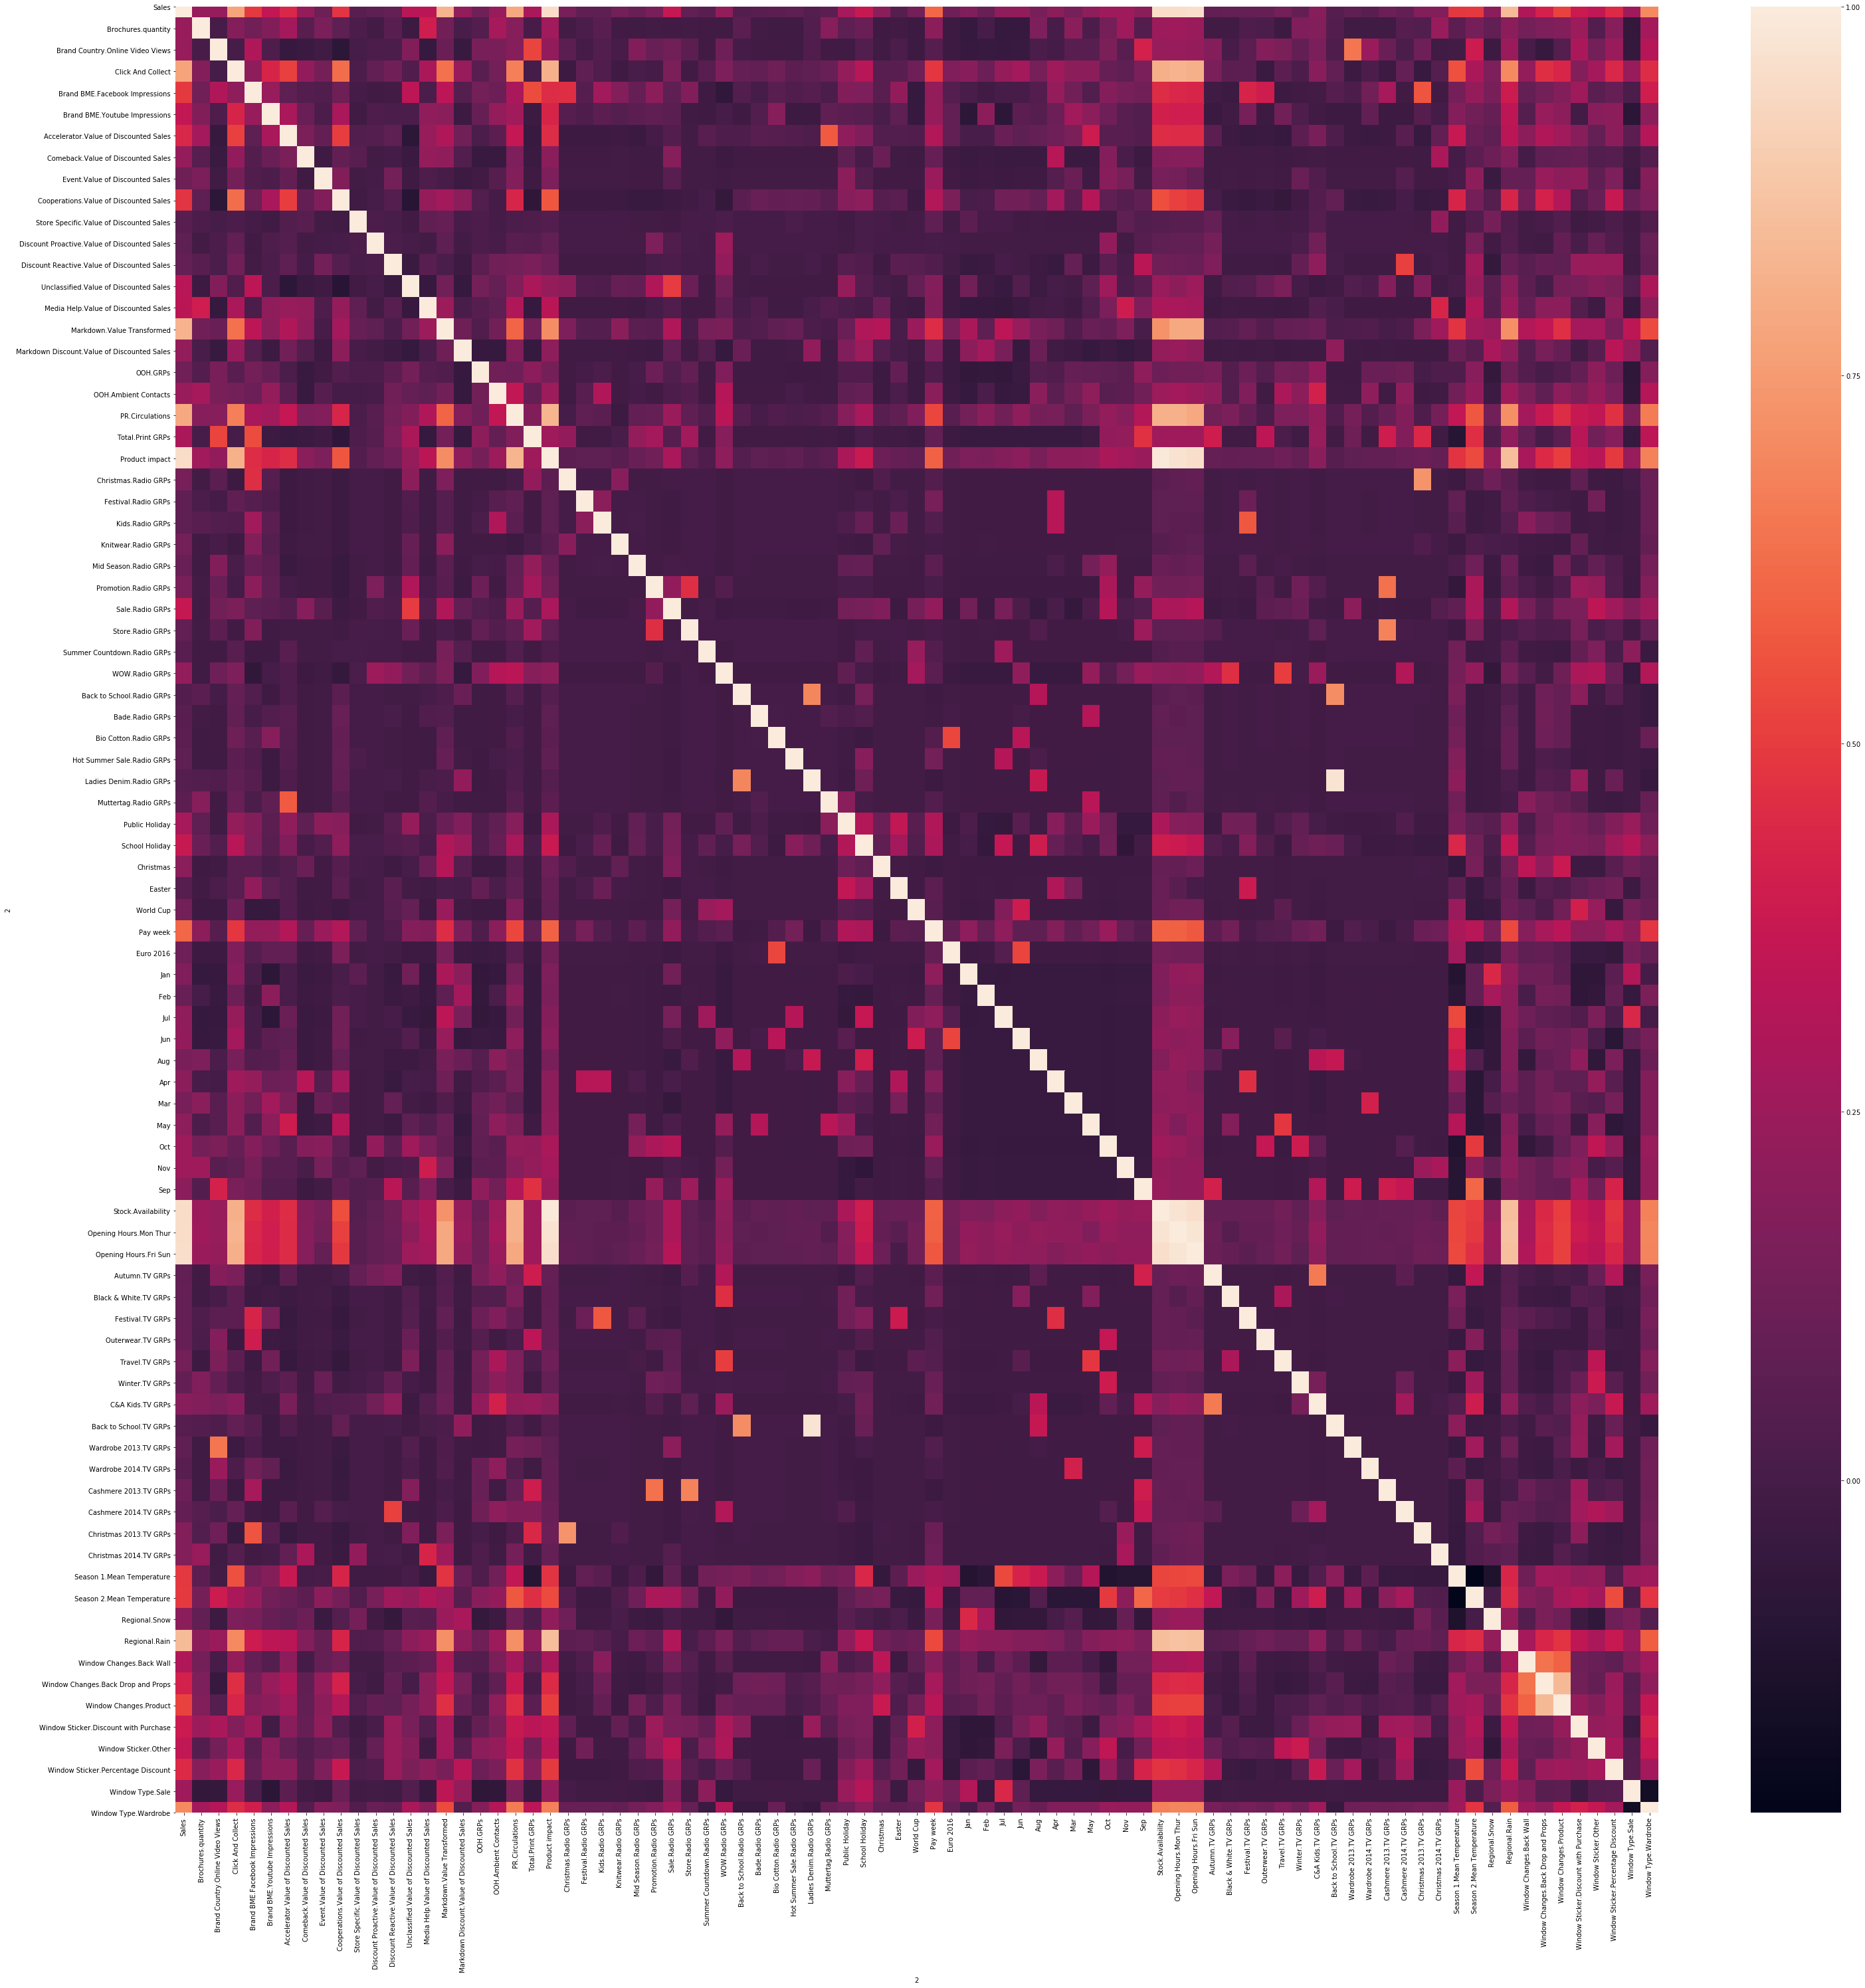

In [18]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, 
            annot=False, fmt=".10f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Heat map analysis shows high correlation between some features such as:

* Product impact',
* Stock.Availability',
* Opening Hours.Mon Thur',
* Opening Hours.Fri Sun' Regional.Rain'

Thus let's check pair plot against 'Sales'

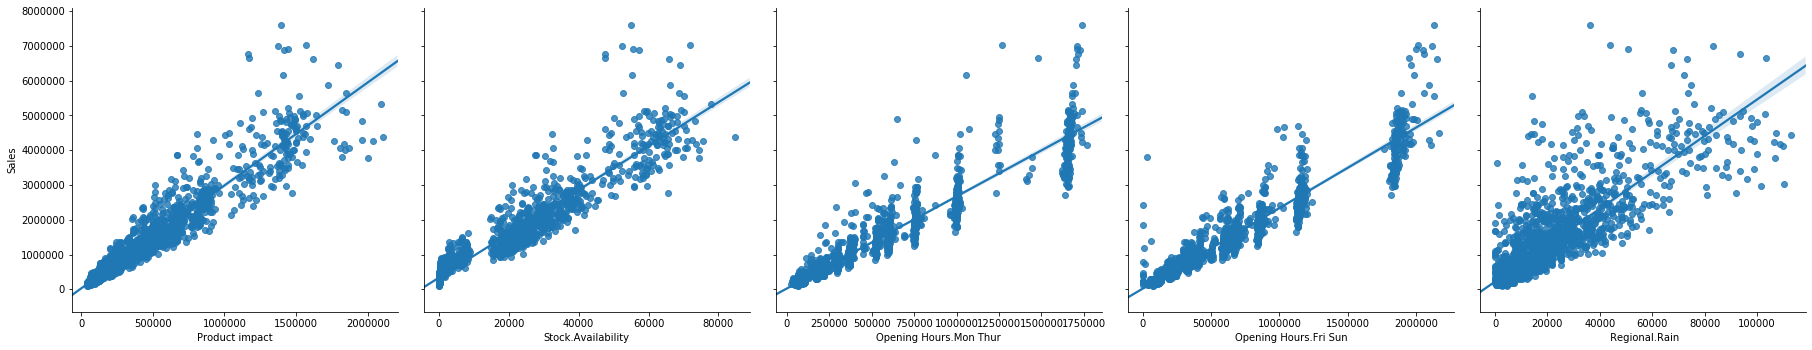

In [19]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
sns.pairplot(df, x_vars=['Product impact','Stock.Availability','Opening Hours.Mon Thur','Opening Hours.Fri Sun',' Regional.Rain'], y_vars='Sales', size=5, aspect=1, kind='reg')

### **Linear regression Interpretation**

    Strong relationship between 'Product impact' and 'Sales'
    
#### **So while modeling our data we should take those categories that have positive correlation and identify its impact on 'sales'**

In this way we can examine the contribution of activities like 'Product impact','Stock.Availability','Opening Hours.Mon Thur','Opening Hours.Fri Sun',' Regional.Rain. We can do similar analysis for rest of the activities.   

# 4. Modelling
## 4.1. Why Linear Regression?

* Model multiple independent variables
* Include continuous and categorical variables
* Assess interaction terms to determine whether the effect of one independent variable depends on the value of another variable

### **Linear regression Pros and Cons**

#### **Pros:**

    -Fast
    -No tuning required
    -Highly interpretable
    -Well-understood

#### **Cons:**

     Unlikely to produce the best predictive accuracy
        -Presumes a linear relationship between the features and response
        -If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the relationship and its  prediction would not be accurate

## 4.2. Preparing X and y as for model training (where dependent variable (sales) and a series of independent variables)

    -scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
    -However, pandas is built on top of NumPy
    -Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [20]:
# create a Python list of feature names
column_list = df.columns
feature_cols = column_list[1:]

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# print the first 5 rows
X.head()

2,Brochures.quantity,Brand Country.Online Video Views,Click And Collect,Brand BME.Facebook Impressions,Brand BME.Youtube Impressions,Accelerator.Value of Discounted Sales,Comeback.Value of Discounted Sales,Event.Value of Discounted Sales,Cooperations.Value of Discounted Sales,Store Specific.Value of Discounted Sales,...,Regional.Snow,Regional.Rain,Window Changes.Back Wall,Window Changes.Back Drop and Props,Window Changes.Product,Window Sticker.Discount with Purchase,Window Sticker.Other,Window Sticker.Percentage Discount,Window Type.Sale,Window Type.Wardrobe
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25947.447286,0.000000,0.000000,0.000000,10984.897677,0.000000,1201.898268,0.0,147572.794519
4,0.0,51193.157252,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78660.526917,0.000000,0.000000,31515.823966,25631.427912,0.000000,5608.858585,0.0,147572.794519
5,0.0,149707.411323,0.0,99.114729,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,99815.883387,0.000000,0.000000,0.000000,25631.427912,0.000000,4006.327560,0.0,147572.794519
6,0.0,31527.245815,0.0,241.911218,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,36817.327558,21539.062942,23989.595145,31515.823966,40277.958147,0.000000,0.000000,0.0,147572.794519
7,0.0,6305.449163,0.0,248.862321,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14025.649362,0.000000,0.000000,0.000000,18308.162794,13394.486032,2003.163780,0.0,147572.794519


In [21]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(2512, 84)


In [22]:
# select a Series from the DataFrame
y = df['Sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = df.Sales

# print the first 5 values
y.head()

3    4136221
4    3824633
5    4802861
6    4576550
7    5558613
Name: Sales, dtype: int64

In [23]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(2512,)


## 4.3. Splitting X and y into training and testing sets

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is **Scikit-Learn**, a package that provides efficient versions of a large number of common algorithms. Scikit-Learn (sklearn) is characterized by a clean, uniform, and streamlined API. Therefore, we have used "sklearn" to feature regression model.

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1884, 84)
(628, 84)
(1884,)
(628,)


## 4.4. Creating Linear regression Model

In [26]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linregsn = LinearRegression()

# fit the model to the training data (learn the coefficients)
linregsn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4.4.1 **Form of linear regression**

$ y=β0+β1x1+β2x2+...+βnxn $

    y is the response
    β0 is the intercept
    β1 is the coefficient for x1(the first feature)
    βn is the coefficient for xn(the nth feature)

In this case:

$y=β0+(β1×Brochures.quantity)+(β2×Brand Country.Online Video Views)+....βn$

The β values are called the model "coefficients"

    -These values are "learned" during the model fitting step using the "least squares" criterion
    -Then, the fitted model can be used to make predictions

### Calculating **Intercepts** and **Coefficients** for Linear Regression

In [27]:
# print the intercept and coefficients
print("The values of intercept is :",linregsn.intercept_)
print()
print("The values of all 84 coefficients is :\n",linregsn.coef_)

The values of intercept is : 14826.002796336543

The values of all 84 coefficients is :
 [-7.17908206e+00  1.02001596e+01  4.87253244e-01 -2.02099576e+03
  1.20863255e+01  2.69470041e-01  9.04807261e-01  3.38446132e-01
  1.43974663e+01 -8.83552038e-01 -2.36831345e-02  3.44933342e+00
  1.17536529e+00  2.02834031e+00  9.83925518e-01  9.20117390e-01
 -7.09755634e-01  9.41705030e-01 -3.75646076e+00  2.75748934e+00
  1.03956105e+00 -1.01572096e+01  2.73550895e+00  2.57651588e+00
  1.02285275e+01 -1.59894768e+00 -1.49118408e+01  2.81857694e+00
  4.77147136e+00  9.35328435e-01  1.01521201e+00  6.28046743e-01
 -3.50228682e+00  2.81540930e+00 -1.91385274e+00 -1.12109483e+01
  6.37686741e+00  2.74751087e-01  4.25783553e+00  9.24078586e-01
 -5.28860766e-02 -2.45578250e+00  1.28714394e+00 -1.09772965e+00
 -1.10229697e+00 -1.50022269e+00 -1.79245087e+00 -3.09068254e+00
 -1.21419452e+00 -1.00705097e+00 -7.59710340e-01 -1.00693172e+00
 -3.36273201e+01 -1.13219715e+00 -1.01017445e+01  8.71643359e-01
 

In [28]:
# pair the feature names with the coefficients
# hard to remember the order, so my favourite zip function  is the way to go to pair the feature names with the coefficients
coeff_feature_pairs = zip(feature_cols, linregsn.coef_)

In [29]:
list(coeff_feature_pairs)

[('Brochures.quantity', -7.179082063558335),
 ('Brand Country.Online Video Views', 10.200159601325494),
 ('Click And Collect', 0.4872532438810082),
 ('Brand BME.Facebook Impressions', -2020.9957584369627),
 ('Brand BME.Youtube Impressions', 12.086325519553704),
 ('Accelerator.Value of Discounted Sales', 0.2694700408320355),
 ('Comeback.Value of Discounted Sales', 0.9048072608284489),
 ('Event.Value of Discounted Sales', 0.3384461315902574),
 ('Cooperations.Value of Discounted Sales', 14.397466272110691),
 ('Store Specific.Value of Discounted Sales', -0.883552037948331),
 ('Discount Proactive.Value of Discounted Sales', -0.023683134539630404),
 ('Discount Reactive.Value of Discounted Sales', 3.4493334242637124),
 ('Unclassified.Value of Discounted Sales', 1.1753652926445672),
 (' Media Help.Value of Discounted Sales', 2.0283403083930103),
 ('Markdown.Value Transformed', 0.9839255182605569),
 (' Markdown Discount.Value of Discounted Sales', 0.9201173903790638),
 ('OOH.GRPs', -0.709755633

### 4.4.2. **Linear Regression equation calculations**,
#### $ y=14826.0027-7.179×Brochures.quantity+1.02001×Brand Country.Online Video Views+....8.898×Window Type.Wardrobe $

How do we interpret the 'Brand Country.Online Video Views' coefficient (1.02001)?

#### For a given amount of Brochures.quantity,Window Type.Wardrobe, etc., a "unit" increase in 'Brand Country.Online Video Views' is associated with a 1.02001 "unit" increase in Sales.

Important notes:

    This is a statement of association, not causation
    The increase in 'Brochures.quantity' was associated with a decrease in sales, as β1 is negative.

### 4.5. Making predictions

In [30]:
# make predictions on the testing set
y_pred = linregsn.predict(X_test)
print(y_pred)

[ 142838.14977189  718214.98081797 2357976.12650029 2034189.68770538
  254248.50993659  549225.14516409  258552.18684353  797348.59963977
  155074.54881604 2611201.51648084  467674.48594103  514913.86393532
  230394.32780756  208551.89530865 1488873.47836199  662831.28106992
 1710851.23035495  566890.06019192 1123557.43872767  788457.16592181
  236256.62604886 2575852.63914055  223950.40902705  348259.32958919
 2444515.23281637  265726.63202948 2106951.42037378  462377.04576398
 2234634.4326178   250231.6264115  3579885.79045415  175275.66071659
  349304.72909545  225884.31879295 2457237.76705166  279229.94376658
  153193.03863211  296063.4730201   345345.60758267  317786.78334053
 2928182.34961096 1758007.1040708   778193.00394771  467433.71623681
 1051857.53633568 1547601.48910702 5854844.5370115   222706.38284094
 1851151.14517379 2240076.38458867  680147.09558615 1489025.300225
  204694.09940441 1086240.61949635 1905196.49957382  256674.85719879
 2425588.47610861  275803.27941791  

# 5. Evaluation

We need an evaluation metric in order to compare our predictions with the actual values.

We need evaluation metrics designed for comparing continuous values.
Evaluation metrics such as **accuracy** are not useful for regression problems.

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

<img src="rmse.png">


**RMSE** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. It is also a measure of how  these residuals are spread out. 
        It is Easier to put in context as it's the same units as our response variable



In [31]:
round(df['Sales'].describe(),2)

count       2512.00
mean     1038370.90
std      1139272.74
min       105887.00
25%       267219.75
50%       536378.50
75%      1425986.25
max      7596053.00
Name: Sales, dtype: float64

In [32]:
# calculate RMSE using scikit-learn
from sklearn import metrics
print("RMSE for linear regression: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE for linear regression:  106836.29653464169


Okay, this is better than nothing but clearly not a great score: 'Sales’ range between 105887.00 and 7596053.00 and rmse of 106836.29 is not very satisfying.

It can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

So now we will perform "feature selection" to improve our regression model.

# 6. Feature selection

**Embedded methods** are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

**Regularization** methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

#### Let's implement **Lasso regularization**. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [33]:
# create a lasso regressor
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train) # Fit the regressor to the data
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 530750428.345424
Best score using built-in LassoCV: 0.985554


In [34]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 72 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

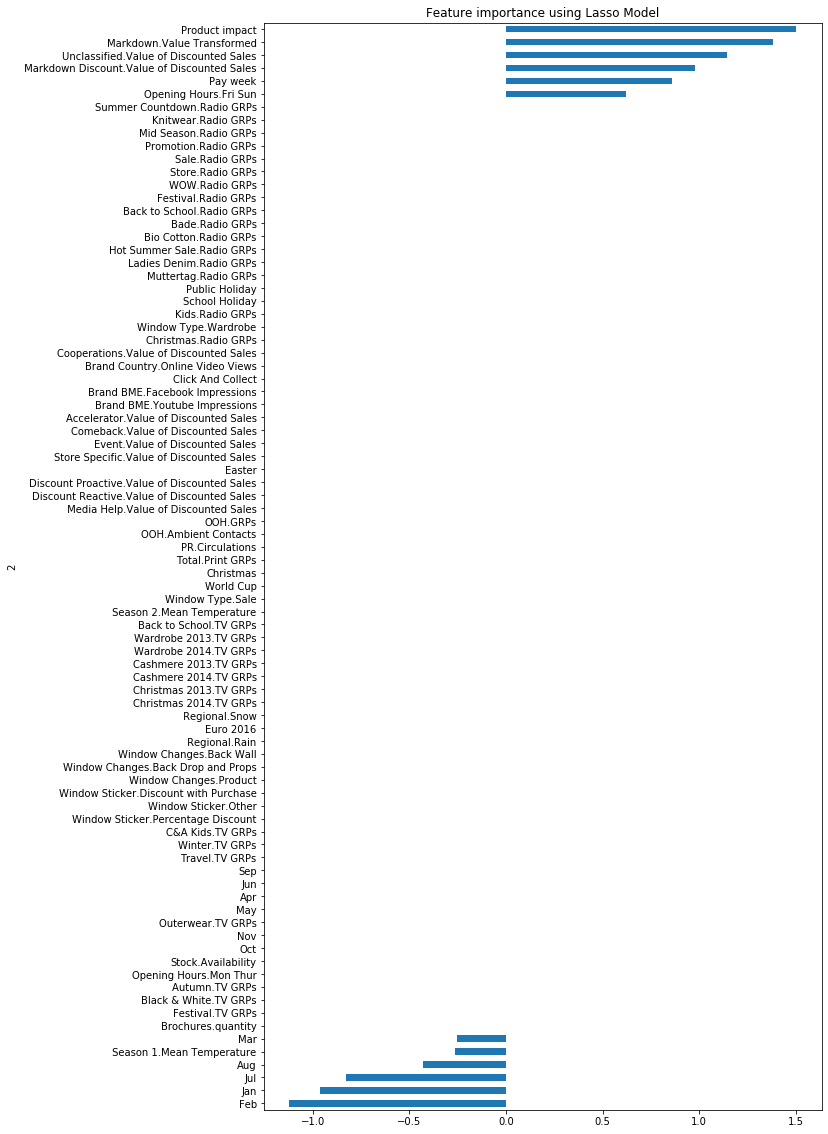

In [35]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

As we can see features like Product impact,Markdown.Value Transformed, Markdown Discount.Value of Discounted Sales.. etc. will have positive impact on modeling and feature like  Season 1.Mean Temperature have negative impact.

In [36]:
# make predictions on the testing set
y_pred_with_lasso = reg.predict(X_test)

# compute the RMSE of our predictions
print("RMSE for Lasso regularizaion: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_with_lasso)))

RMSE for Lasso regularizaion:  134519.12065651122


This didnt work well, lets try Ridge Regression technique

**Lasso** and **Ridge** are forms of regularized linear regressions. They use different penalty functions. Ridge uses l2 whereas lasso go with l1. In ridge regression, the penalty is the sum of the squares of the coefficients and for the Lasso, it’s the sum of the absolute values of the coefficients. It’s a shrinkage towards zero using an absolute value (l1 penalty) rather than a sum of squares(l2 penalty).

The regularization can also be interpreted as prior in a maximum a posteriori estimation method. Under this interpretation, the ridge and the lasso make different assumptions on the class of linear transformation they infer to relate input and output data. In the ridge, the coefficients of the linear transformation are normal distributed and in the lasso they are Laplace distributed. In the lasso, this makes it easier for the coefficients to be zero and therefore easier to eliminate some of your input variable as not contributing to the output.

<img src="lasso.png">


## Ridge Regression

**Ridge regression** is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

In scikit-learn, a ridge regression model is constructed by using the Ridge class. The first line of code below instantiates the Ridge Regression model with an alpha value of 0.01. The second line fits the model to the training data.



In [37]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
y_pred_train_rr= rr.predict(X_train)
print("RMSE for Ridge regularizaion: ",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_rr)))

RMSE for Ridge regularizaion:  95882.45749139601


### ElasticNet Regression

**ElasticNet** combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In scikit-learn, an ElasticNet regression model is constructed by using the ElasticNet class. The first line of code below instantiates the ElasticNet Regression with an alpha value of 0.01. The second line fits the model to the training data.

In [38]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
y_pred_train_enet= model_enet.predict(X_train)
print("RMSE for Elastic Net: ",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_enet)))

RMSE for Elastic Net:  95883.30427645116


So finally, the method of Ridge Regression increased the performance of the model.

# 7. Impact of each activity on sales

### Category - Brochures

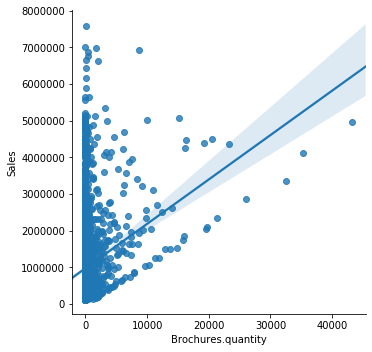

In [39]:
sns.pairplot(df, x_vars=['Brochures.quantity'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Brochures doesn't have good impact on sales as there is no relationship between the two variable

### Category - Digital

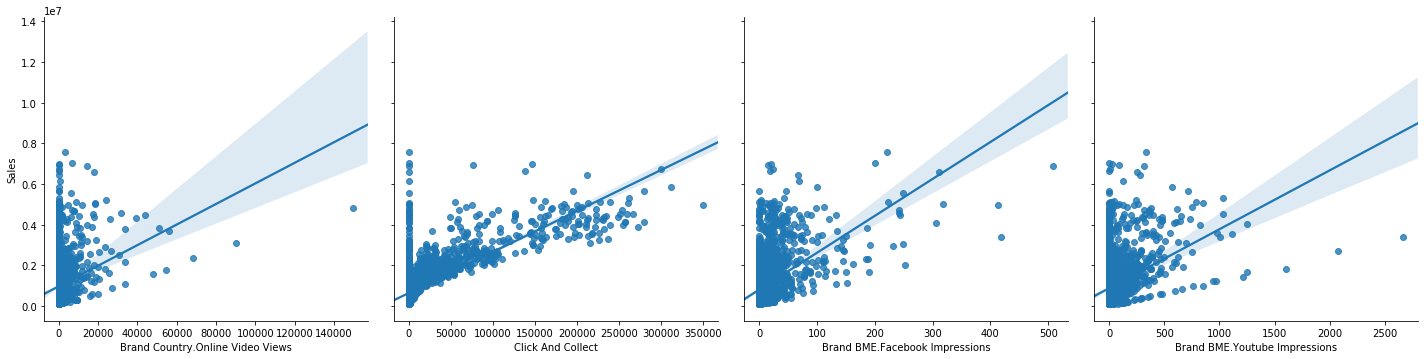

In [40]:
sns.pairplot(df, x_vars=['Brand Country.Online Video Views','Click And Collect','Brand BME.Facebook Impressions','Brand BME.Youtube Impressions'], y_vars='Sales',size=5, aspect=1, kind='reg')

#### In Digital category, 'Click And Collect' has a better relationship with sales. Thus, showing some impact on sales.

### Category - Discounts

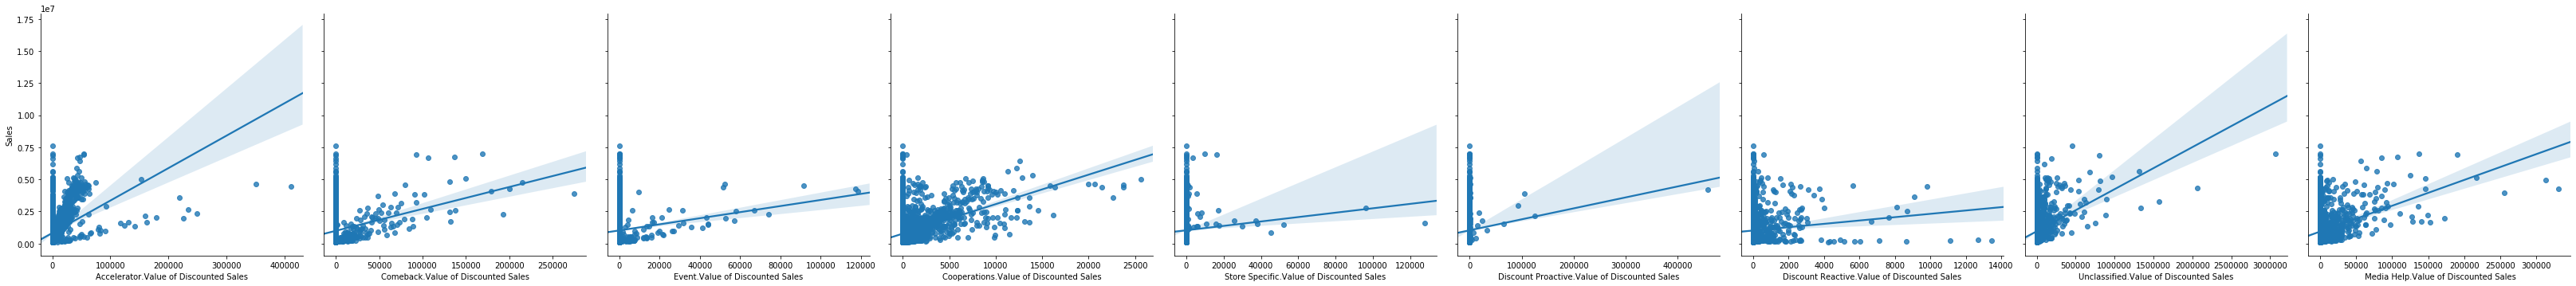

In [41]:
sns.pairplot(df, x_vars=['Accelerator.Value of Discounted Sales','Comeback.Value of Discounted Sales','Event.Value of Discounted Sales','Cooperations.Value of Discounted Sales','Store Specific.Value of Discounted Sales','Discount Proactive.Value of Discounted Sales','Discount Reactive.Value of Discounted Sales','Unclassified.Value of Discounted Sales',' Media Help.Value of Discounted Sales'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### In Discount marketing category, 'Cooperations.Value of Discounted Sales' feature shows a better relationship with sales and its impact on it.

### Category - Markdown

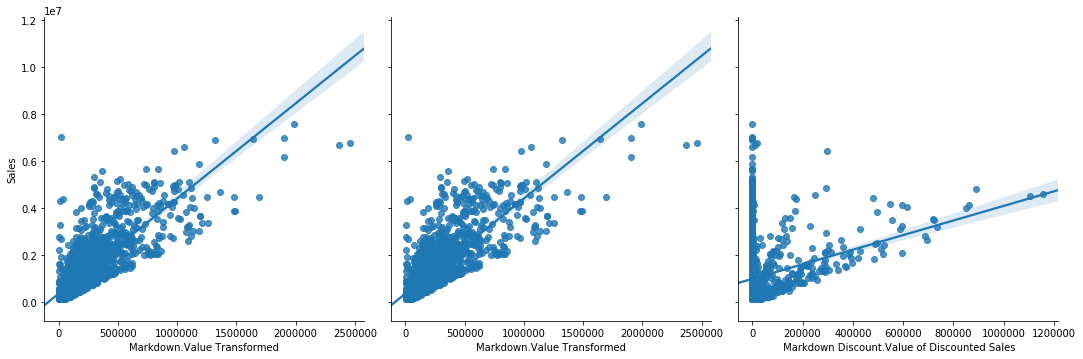

In [42]:
sns.pairplot(df, x_vars=['Markdown.Value Transformed','Markdown.Value Transformed',' Markdown Discount.Value of Discounted Sales'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### In Markdown category, 'Markdown.Value Transformed' and 'Markdown.Value Transformed' features shows a little better relationship with sales compared to other and has impact on it.

### Category - Outdoor

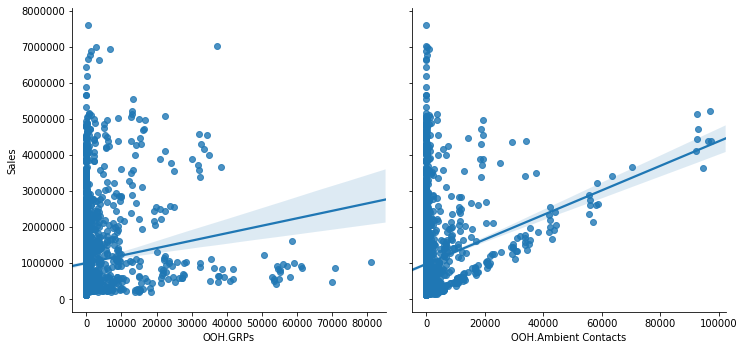

In [43]:
sns.pairplot(df, x_vars=['OOH.GRPs','OOH.Ambient Contacts'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Here in Outdoor, we can see that it doesn't impact sales by using any of it's campaigning technique.

### Category - PR

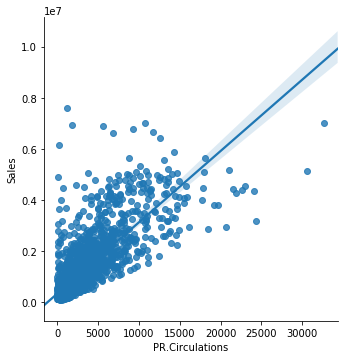

In [44]:
sns.pairplot(df, x_vars=['PR.Circulations'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### PR has a good impact on sales

### Category - Print

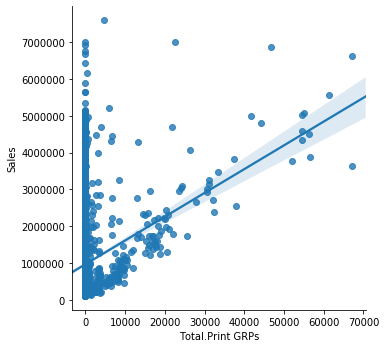

In [45]:
sns.pairplot(df, x_vars=['Total.Print GRPs'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Print media activity doesn't impact sales

### Category - Product impact

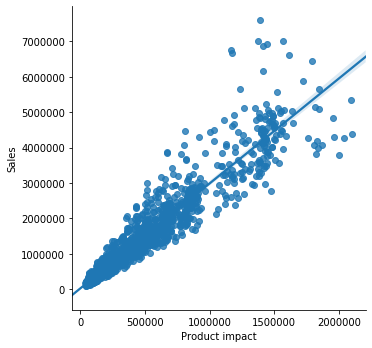

In [46]:
sns.pairplot(df, x_vars=['Product impact'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Measure of how strong the product range is has a high impact on sales with strong relationship

### Category - Radio

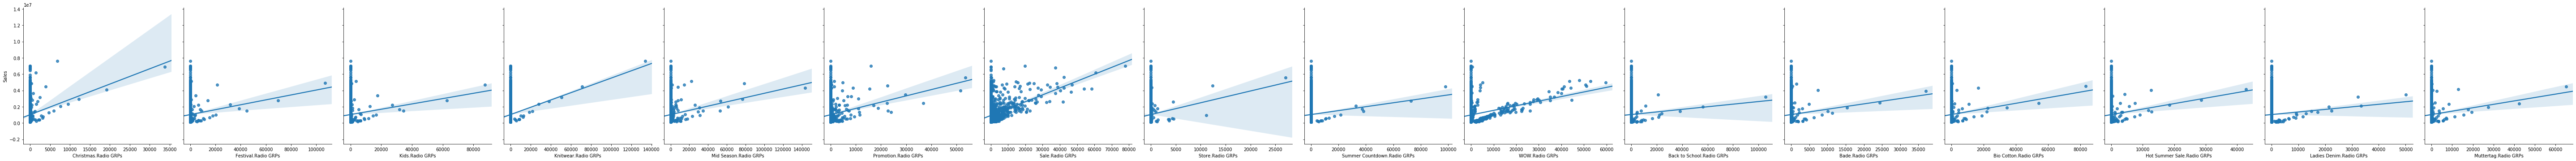

In [47]:
sns.pairplot(df, x_vars=['Christmas.Radio GRPs','Festival.Radio GRPs','Kids.Radio GRPs','Knitwear.Radio GRPs','Mid Season.Radio GRPs','Promotion.Radio GRPs','Sale.Radio GRPs','Store.Radio GRPs','Summer Countdown.Radio GRPs','WOW.Radio GRPs','Back to School.Radio GRPs','Bade.Radio GRPs','Bio Cotton.Radio GRPs','Hot Summer Sale.Radio GRPs','Ladies Denim.Radio GRPs','Muttertag.Radio GRPs'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### In Radio media activity, 'Sale.Radio GRPs' has a small relationship with sales

### Category - Seasonality

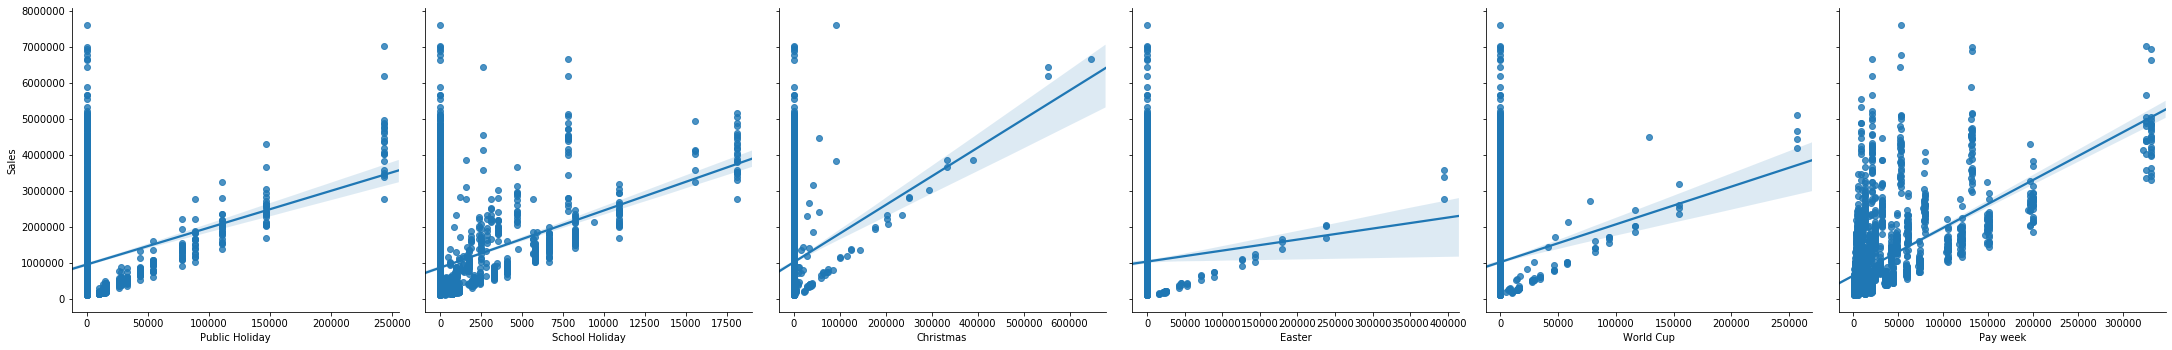

In [48]:
sns.pairplot(df, x_vars=['Public Holiday','School Holiday','Christmas','Easter','World Cup','Pay week'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Monthly seasonality and key events, e.g. Christmas, Easter … has a weaker relationship with sales. Therefore, it doesn't shows any impact on sales. 

### Category - Stock availability

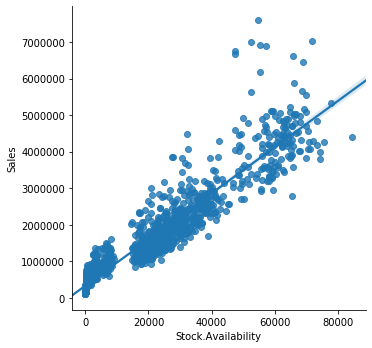

In [49]:
sns.pairplot(df, x_vars=['Stock.Availability'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Measure of how many different products are available for sale has high impact in marketing campaign

### Category - Opening Hours

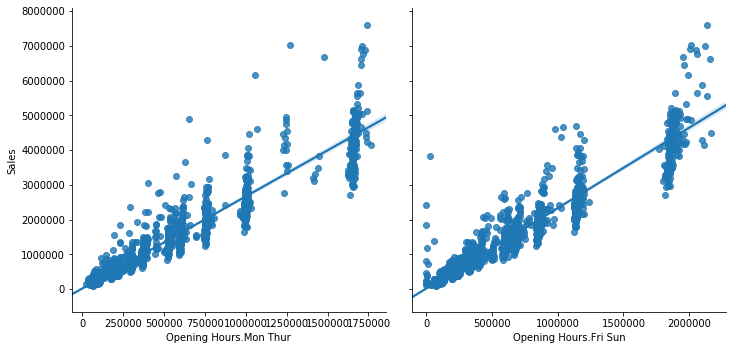

In [50]:
sns.pairplot(df, x_vars=['Opening Hours.Mon Thur','Opening Hours.Fri Sun'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Opening hours shows a weak relationship with sales.

### Category - TV

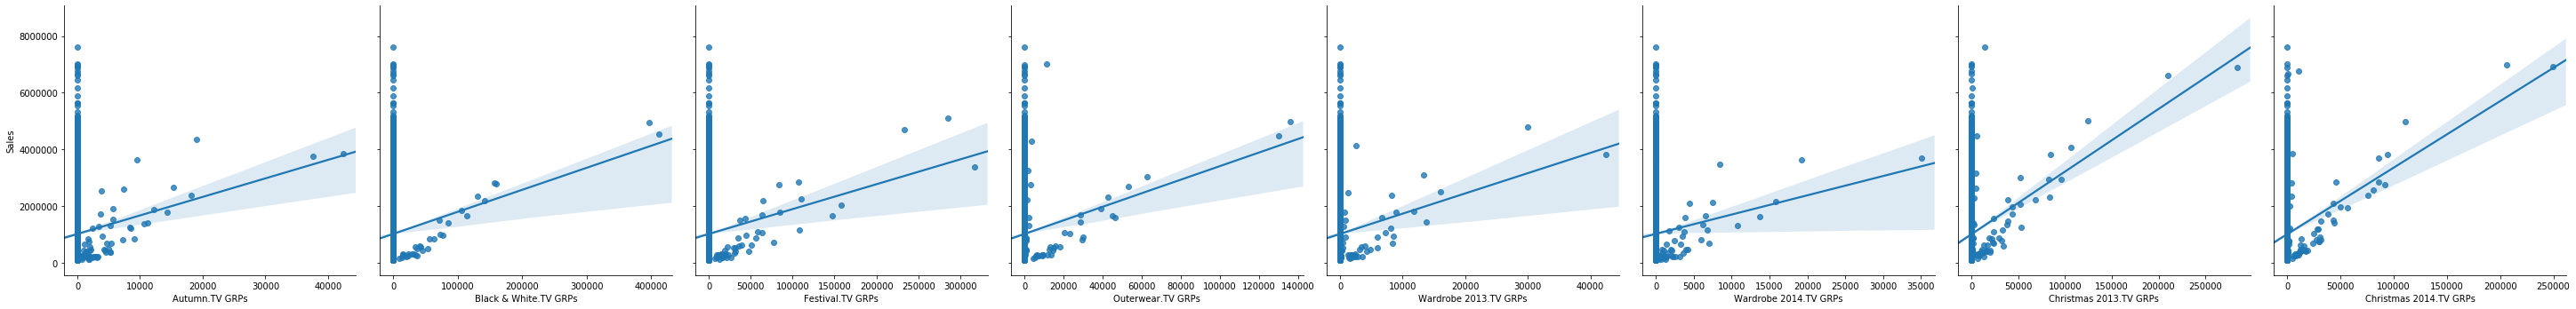

In [51]:
sns.pairplot(df, x_vars=['Autumn.TV GRPs','Black & White.TV GRPs','Festival.TV GRPs','Outerwear.TV GRPs','Wardrobe 2013.TV GRPs','Wardrobe 2014.TV GRPs','Christmas 2013.TV GRPs','Christmas 2014.TV GRPs'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Usually TV has a great impact on marketing but the categories that are used here has no impact on sales.

### Category - Weather

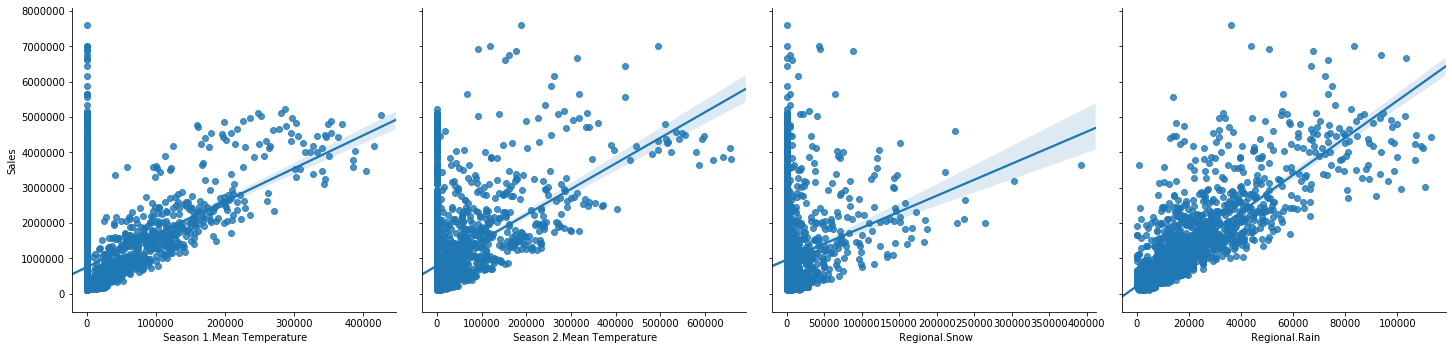

In [52]:
sns.pairplot(df, x_vars=[' Season 1.Mean Temperature',' Season 2.Mean Temperature',' Regional.Snow',' Regional.Rain'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### 'Regional.Rain' has a great impact on sales

### Category - Windows

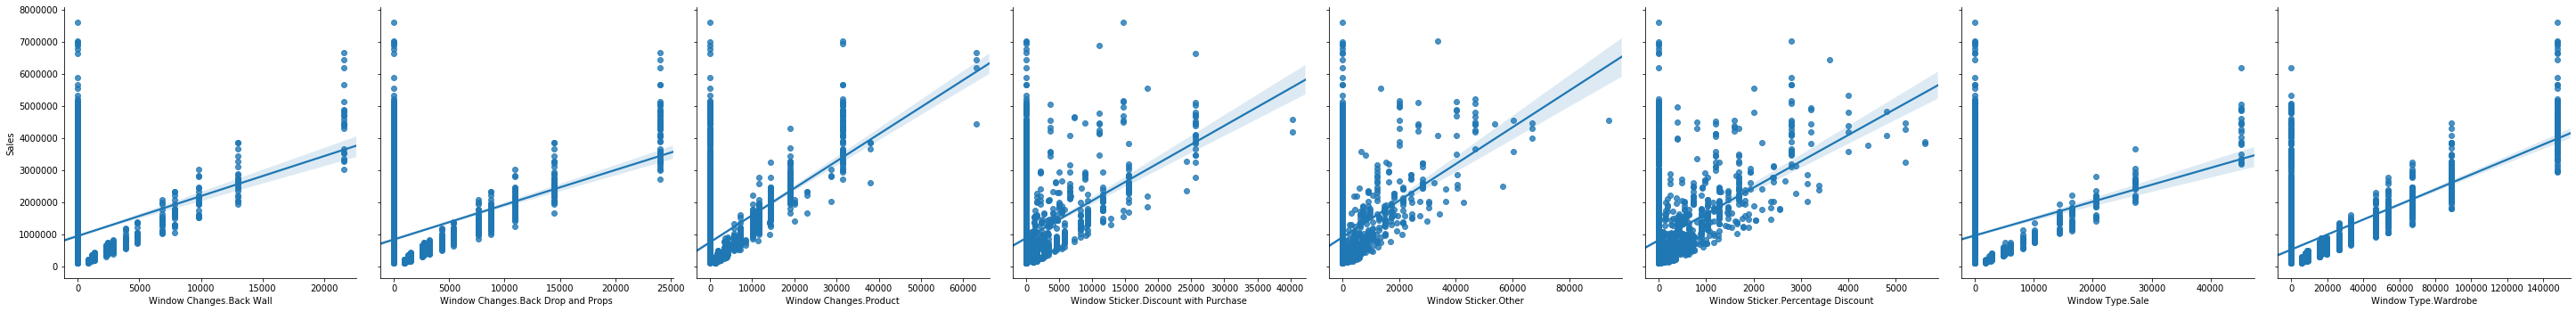

In [53]:
sns.pairplot(df, x_vars=['Window Changes.Back Wall','Window Changes.Back Drop and Props','Window Changes.Product','Window Sticker.Discount with Purchase','Window Sticker.Other','Window Sticker.Percentage Discount','Window Type.Sale','Window Type.Wardrobe'], y_vars='Sales', size=5, aspect=1, kind='reg')

#### Series of variables indicating which elements of the windows changed has a weak impact on sales

Notes for Examiner:
    
    I had a few doubts for the column named "Category.Value", so I dropped it at the very start.
    Further other modeling techniques like DecisionTreeRegressor can be used.
    Alternative method of Cross Validation can be used to enhance the training process.

# THANK YOU